# Exploratory Data Analysis (Retail)

By: John Klenn Andrew P. Dungaran \
Date: April 2024

## Introduction

Task #3 from The Sparks Foundation - Graduate Rotational Internship Program, conducted in April 2024, involved Exploratory Data Analysis of a retail store based in the US.

### Step 4: Feature Relationship
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby Comparisons
### Step 5: Asking Question
* Formulate questions about the dataset
* Answer the questions

## Step 0: Imports and Reading Data

Importing all the necessary tools that will be needed in the analysis.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [101]:
# Read the Dataset
df_store = pd.read_csv('SampleSuperstore.csv')

## Step 1: Understanding the Data

What does this dataset contains?
* Dataframe `shape`
* `head` and `tail`
* `dtypes` or `info`
* `describe`

In [102]:
# Inspecting what the dataset contains
df_store.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [103]:
# Determining the number of rows and columns
dfshape = df_store.shape
print(f'Number of Rows: {dfshape[0]}')
print(f'Number of Columns: {dfshape[1]}')

Number of Rows: 9994
Number of Columns: 13


In [104]:
# Determining the datatypes of each column
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [105]:
# Getting the statistical overview of the dataset
df_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Step 2: Data Preperation

Clean the data!
* Dropping irrelevant columns and/or rows
* Identifying duplicates
* Renaming
* Feature creation

In [106]:
# Renaming Columns
df_store.rename(columns={'Ship Mode': 'Ship_Mode', 'Postal Code': 'Postal_Code'}, inplace=True)

In [107]:
# Number of duplicates
df_store.duplicated().value_counts()

False    9977
True       17
Name: count, dtype: int64

We found out that there are `17` duplicates in the dataset.

Since there are no unique identifiers (such as codes or shipment dates) to distinguish between duplicate values, we will need to seek insights from other departments to further investigate these duplicates. 

However, for the purposes of our current analysis, we will proceed by removing these duplicate values from the dataset.

In [108]:
df_store = df_store.loc[~df_store.duplicated()].copy()
df_store

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Step 3: Feature Relationship

* Numerical and/or Categorical Analysis
* Plotting feature distributions
    * Histogram
    * Boxplot
    * Pie Chart
    * Barplot
    * Scatterplot
    * Heatmap Correlation
    * Pairplot

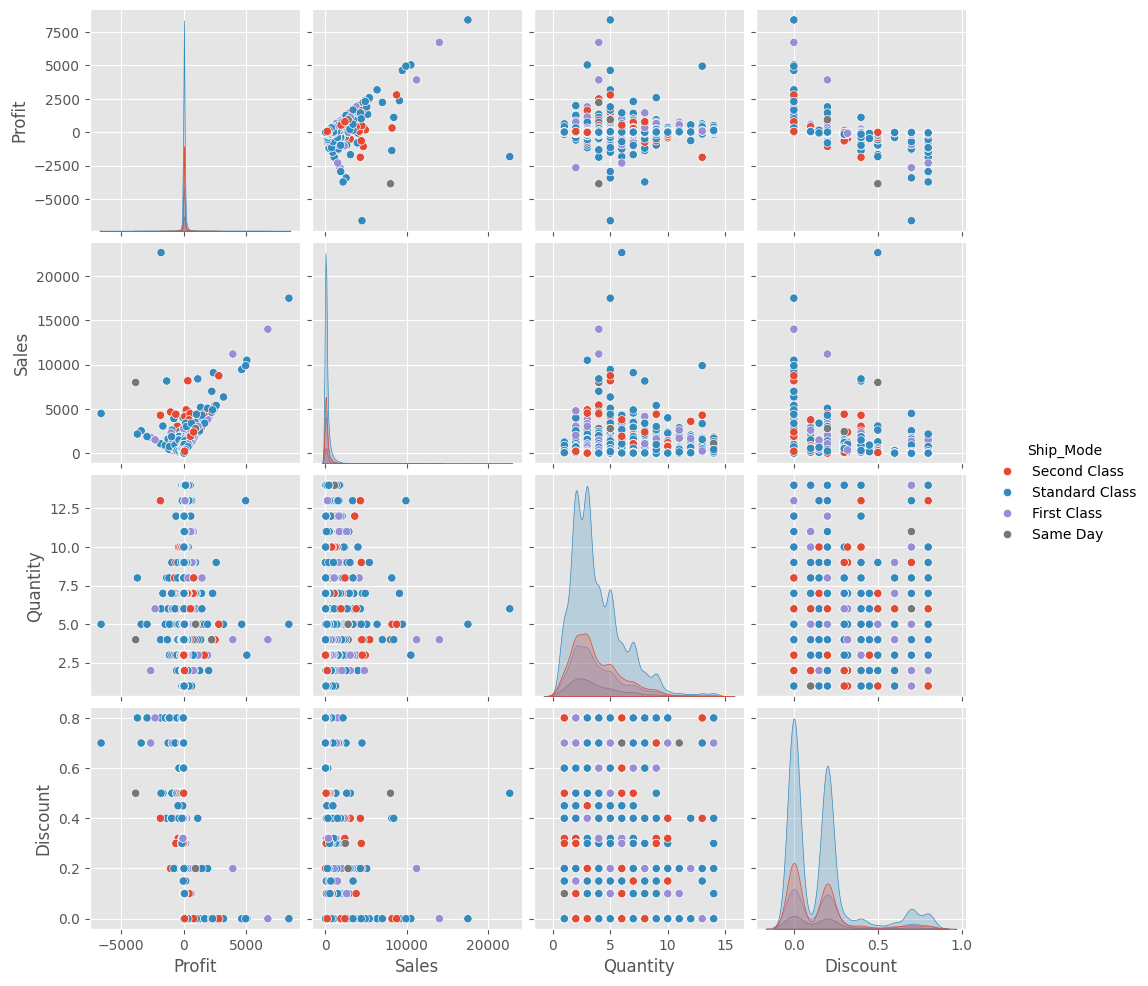

In [109]:
# PairPlot to get an overall view of what we're dealing with
sns.pairplot(df_store, vars=['Profit', 'Sales', 'Quantity', 'Discount'], hue='Ship_Mode')
plt.show()

### Numerical Analysis

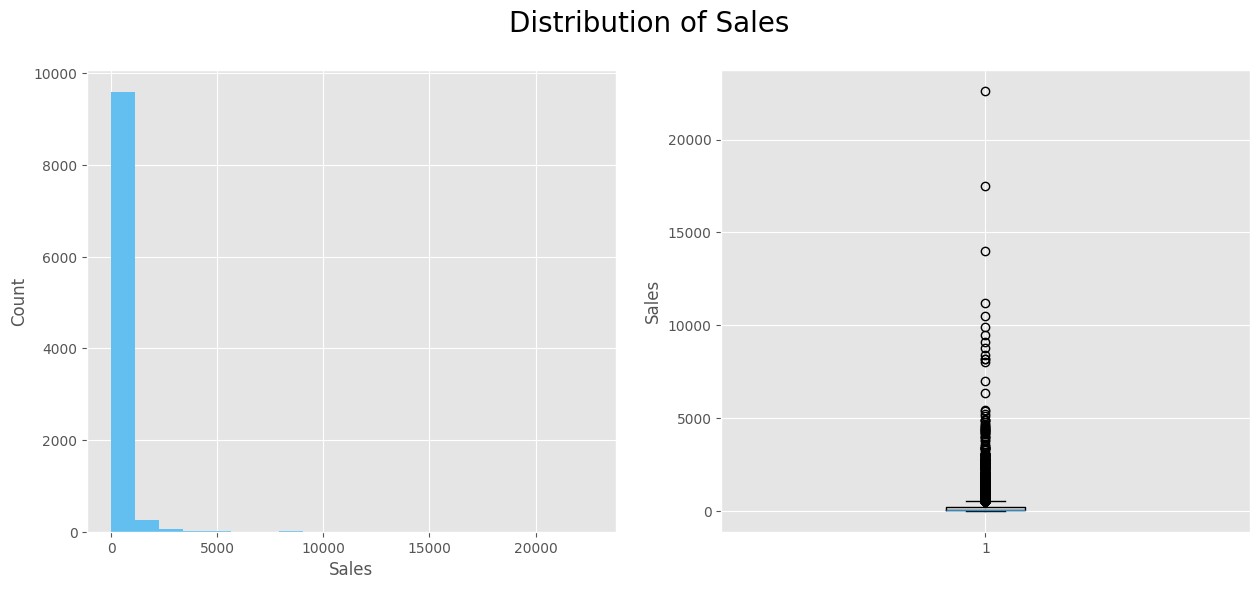

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Blue = #1984c5, Red = #de6e56
ax1.hist(df_store['Sales'], bins=20, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Sales')

ax2.boxplot(df_store['Sales'])
ax2.set_ylabel('Sales')

plt.suptitle('Distribution of Sales', fontsize=20)
plt.show()

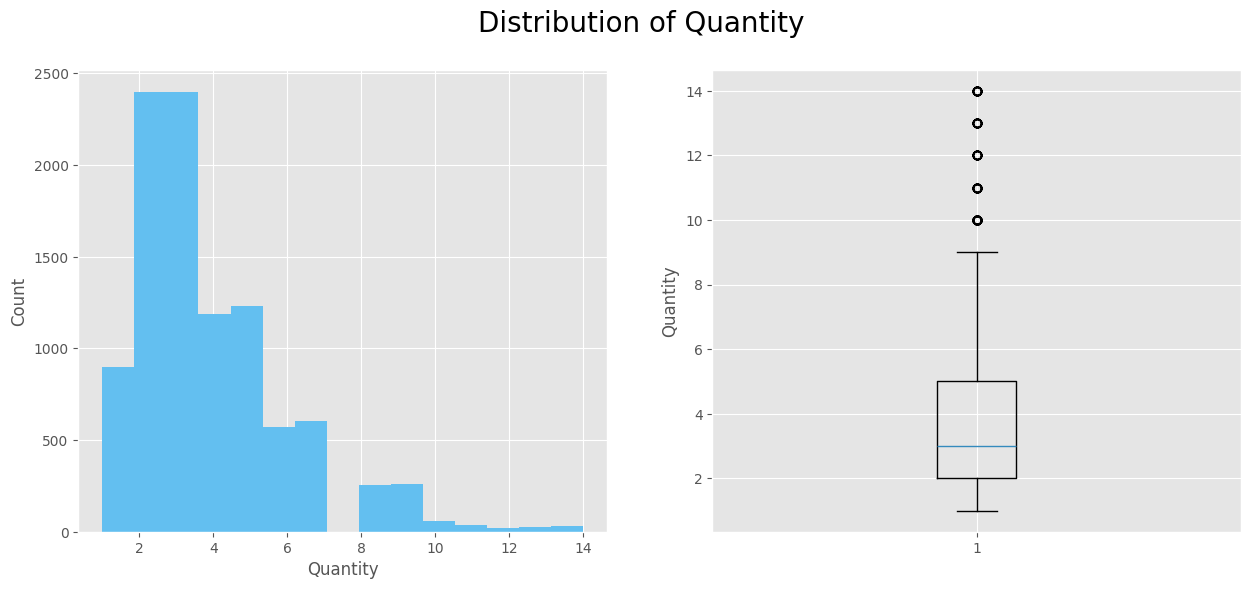

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.hist(df_store['Quantity'], bins=15, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Quantity')

ax2.boxplot(df_store['Quantity'])
ax2.set_ylabel('Quantity')

plt.suptitle('Distribution of Quantity', fontsize=20)
plt.show()

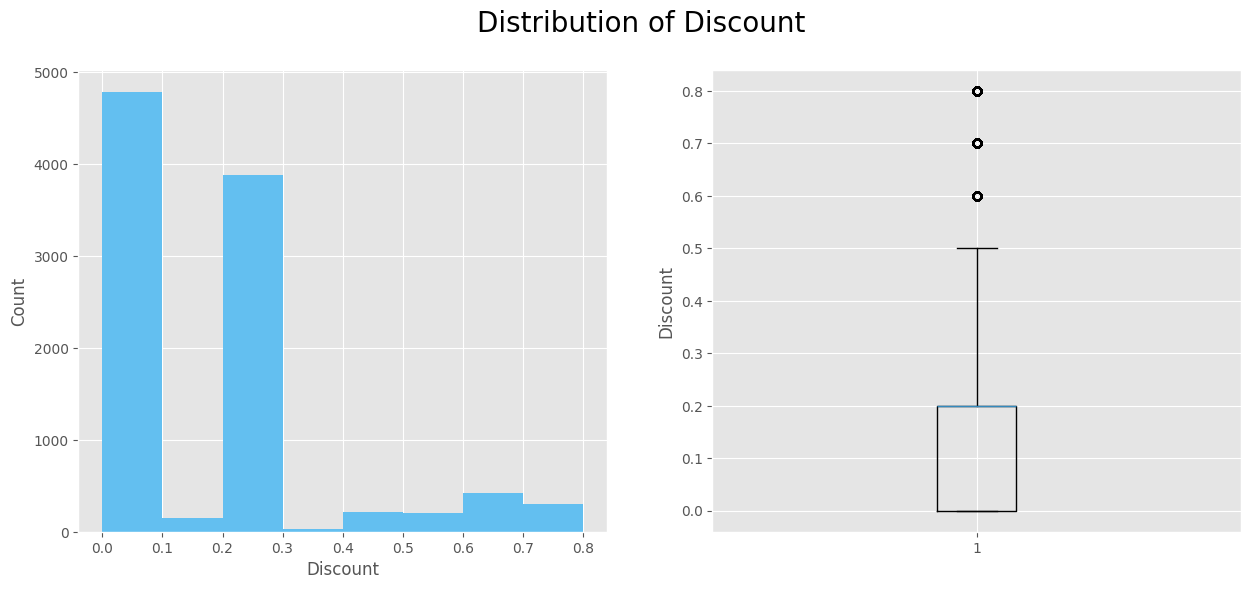

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.hist(df_store['Discount'], bins=8, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Discount')

ax2.boxplot(df_store['Discount'])
ax2.set_ylabel('Discount')

plt.suptitle('Distribution of Discount', fontsize=20)
plt.show()

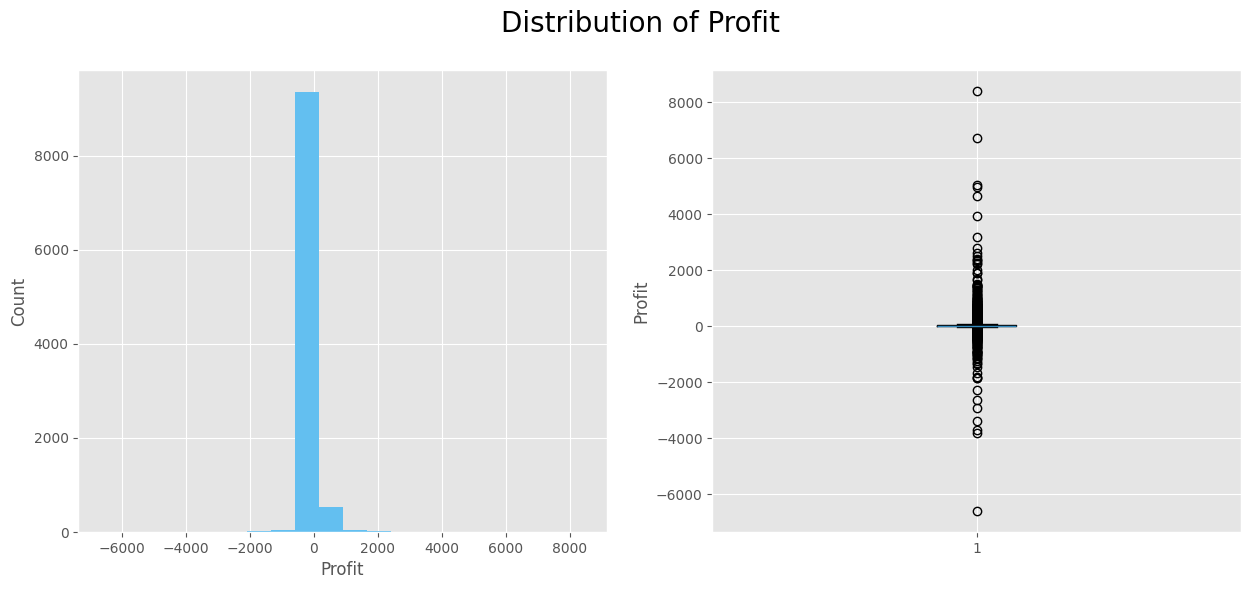

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.hist(df_store['Profit'], bins=20, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Profit')

ax2.boxplot(df_store['Profit'])
ax2.set_ylabel('Profit')

plt.suptitle('Distribution of Profit', fontsize=20)
plt.show()

### Correlation

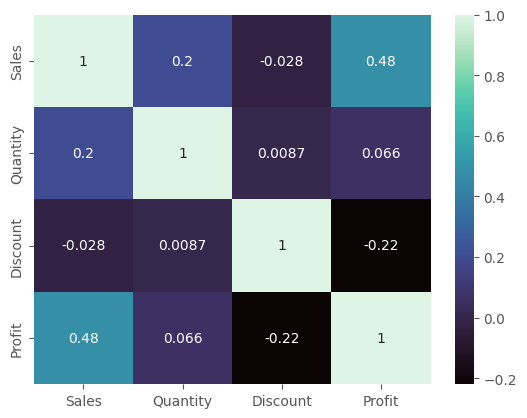

In [114]:
sns.heatmap(df_store[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap=sns.color_palette('mako', as_cmap=True))
plt.show()

#### Key Takeaway

* The **Profit** and **Sales** have a **POSITIVE** correlation. `R = 0.48`
* The **Sales** and **Quantity** have a **POSITIVE** correlation. `R = 0.2`
* The **Profit** and **Discount** have a **NEGATIVE** correlation. `R = -0.22`
* Everything else either have very weak correlation or no correlation with each other. `R ≈ 0`

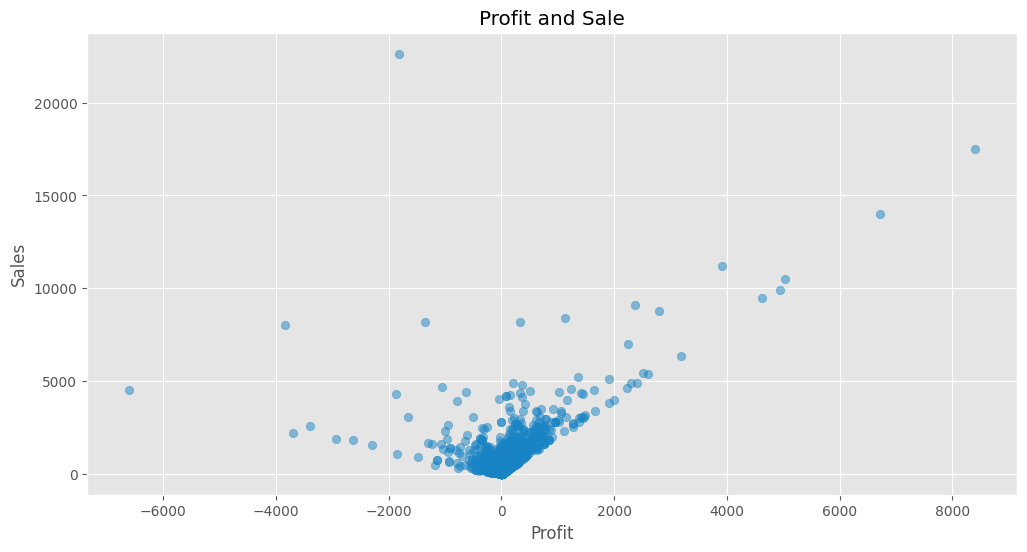

In [115]:
# Scatter plot Profit and Sales

plt.figure(figsize=(12,6))
plt.scatter(df_store['Profit'], df_store['Sales'], color='#1984c5', alpha=0.5)
plt.ylabel('Sales')
plt.xlabel('Profit')
plt.title('Profit and Sale')

plt.show()

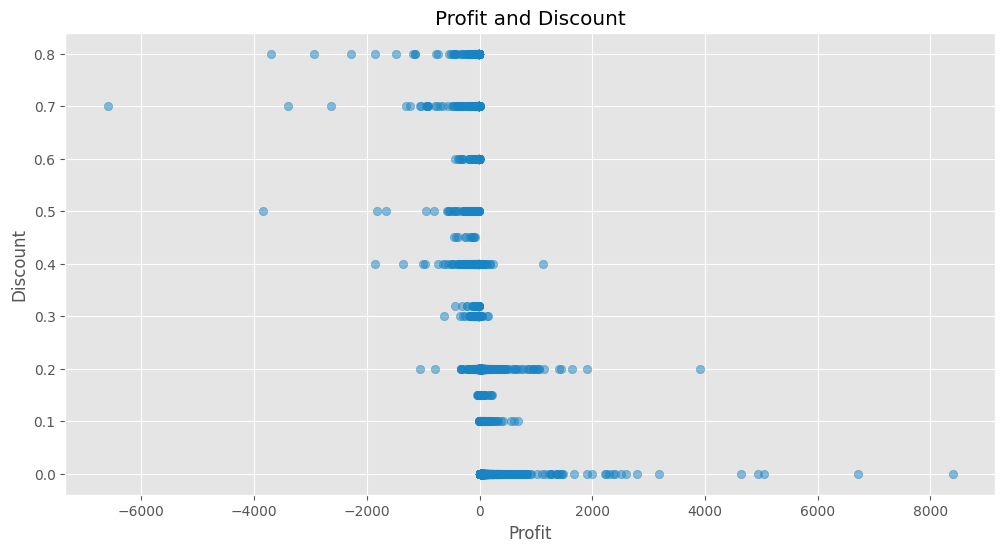

In [116]:
# Scatter plot Profit and Discount

plt.figure(figsize=(12,6))
plt.scatter(df_store['Profit'], df_store['Discount'], color='#1984c5', alpha=0.5)
plt.ylabel('Discount')
plt.xlabel('Profit')
plt.title('Profit and Discount')

plt.show()

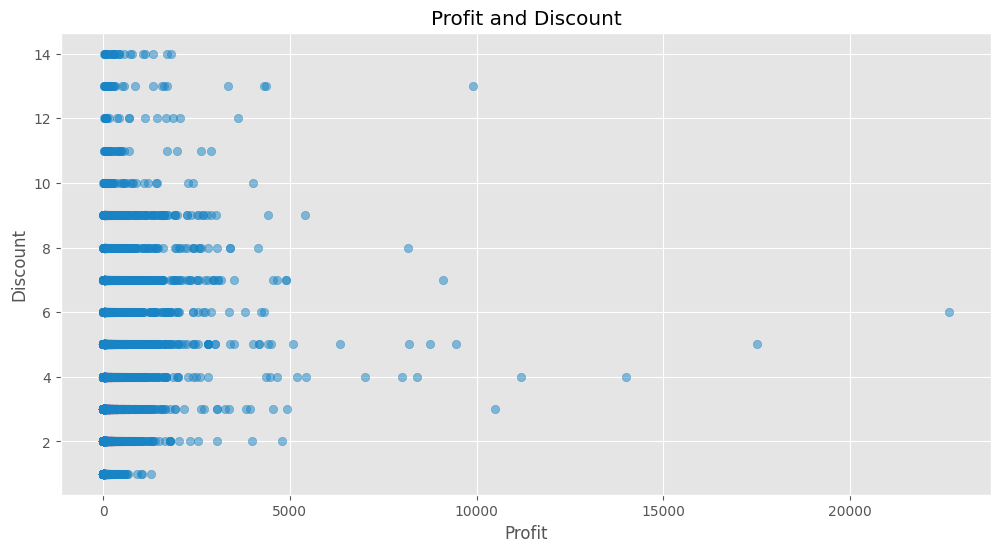

In [117]:
# Scatter plot Profit and Discount

plt.figure(figsize=(12,6))
plt.scatter(df_store['Sales'], df_store['Quantity'], color='#1984c5', alpha=0.5)
plt.ylabel('Discount')
plt.xlabel('Profit')
plt.title('Profit and Discount')

plt.show()

### Categorical Analysis

BAR PLOTS, and PIE CHARTS of PROFIT/SALES/QUANTITY/DISCOUNT with CATEGORICAL FEATURES


#### Ship Mode

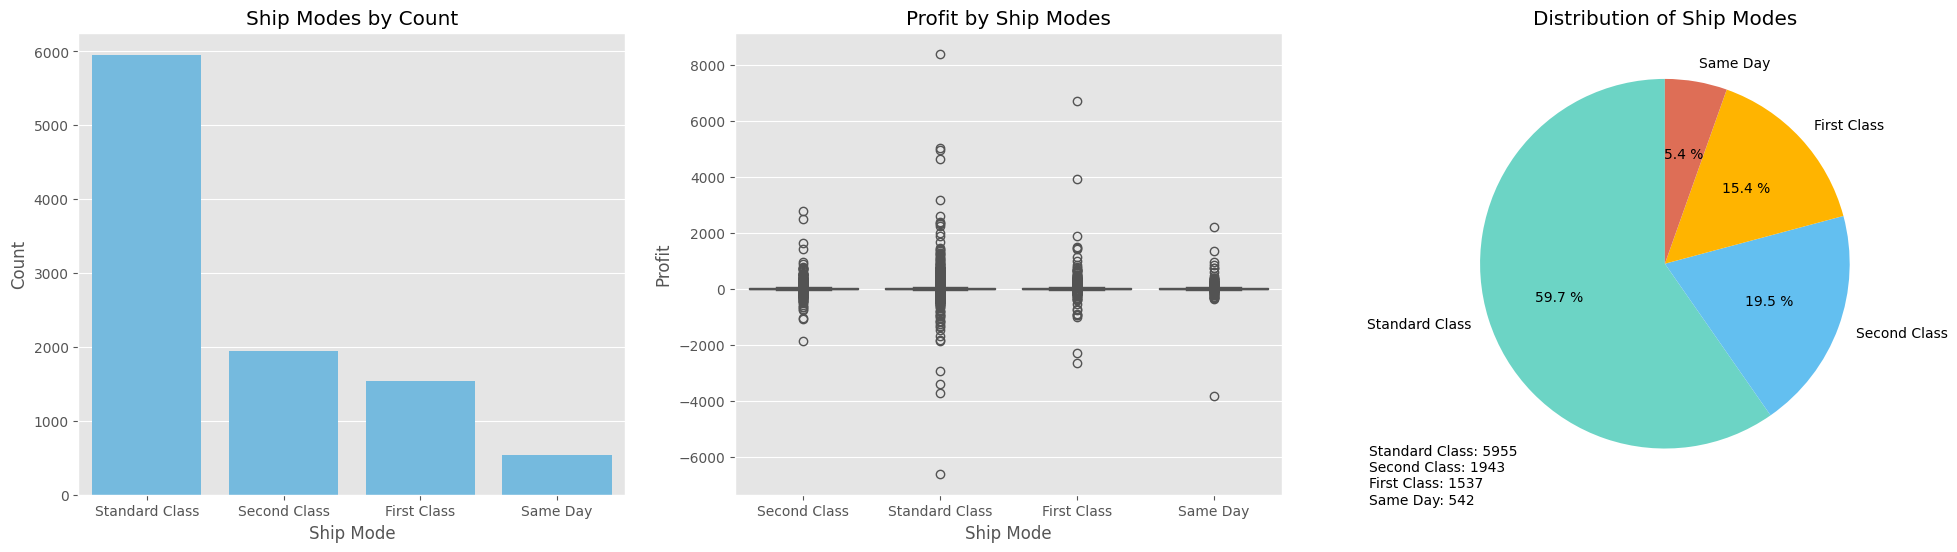

In [118]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
sm_count = df_store['Ship_Mode'].value_counts()

# Barplot
ax1 = sns.barplot(sm_count, ax=ax1,  color='#63bff0')
ax1.set_title('Ship Modes by Count')
ax1.set_ylabel('Count')
ax1.set_xlabel('Ship Mode')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Ship_Mode'], ax=ax2)
ax2.set_title('Profit by Ship Modes')
ax2.set_xlabel('Ship Mode')

# Piechart
sm_colors = ['#6cd4c5', '#63bff0', '#ffb400', '#de6e56']
sm_labels = ['Standard Class', 'Second Class', 'First Class', 'Same Day']
plt.pie(sm_count, colors=sm_colors, labels=sm_labels, autopct='%.1f %%', startangle=90)
plt.title('Distribution of Ship Modes')
plt.text(-1.6, -1.3, f'Standard Class: {sm_count.iloc[0]}\nSecond Class: {sm_count.iloc[1]}\nFirst Class: {sm_count.iloc[2]}\nSame Day: {sm_count.iloc[3]}', horizontalalignment='left')

plt.show()

#### Segment

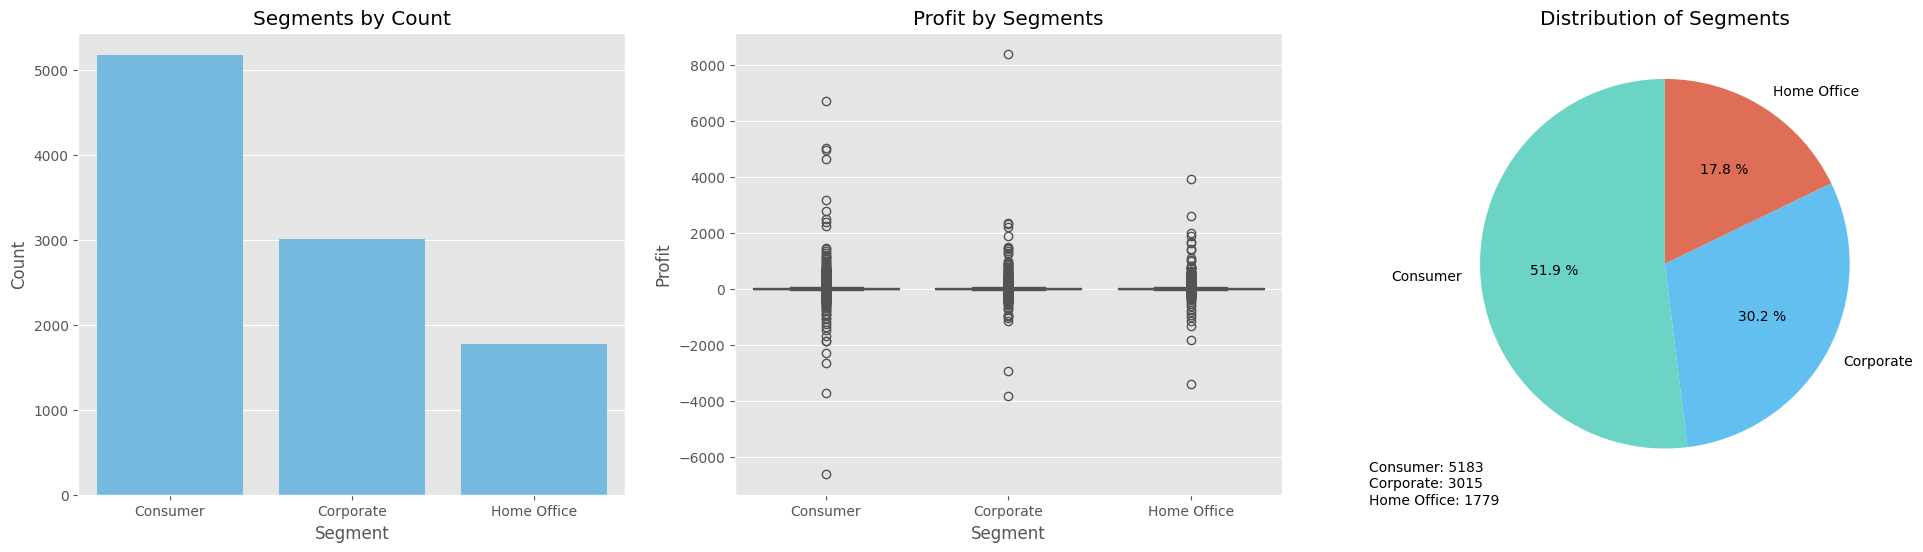

In [121]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
s_count = df_store['Segment'].value_counts()

# Barplot
ax1 = sns.barplot(s_count, ax=ax1,  color='#63bff0')
ax1.set_title('Segments by Count')
ax1.set_ylabel('Count')
ax1.set_xlabel('Segment')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Segment'], ax=ax2)
ax2.set_title('Profit by Segments')
ax2.set_xlabel('Segment')

# Piechart
s_colors = ['#6cd4c5', '#63bff0', '#de6e56']
s_labels = ['Consumer', 'Corporate', 'Home Office']
plt.pie(s_count, colors=s_colors, labels=s_labels, autopct='%.1f %%', startangle=90)
plt.title('Distribution of Segments')
plt.text(-1.6, -1.3, f'Consumer: {s_count.iloc[0]}\nCorporate: {s_count.iloc[1]}\nHome Office: {s_count.iloc[2]}', horizontalalignment='left')

plt.show()

#### Category

ValueError: 'label' must be of length 'x'

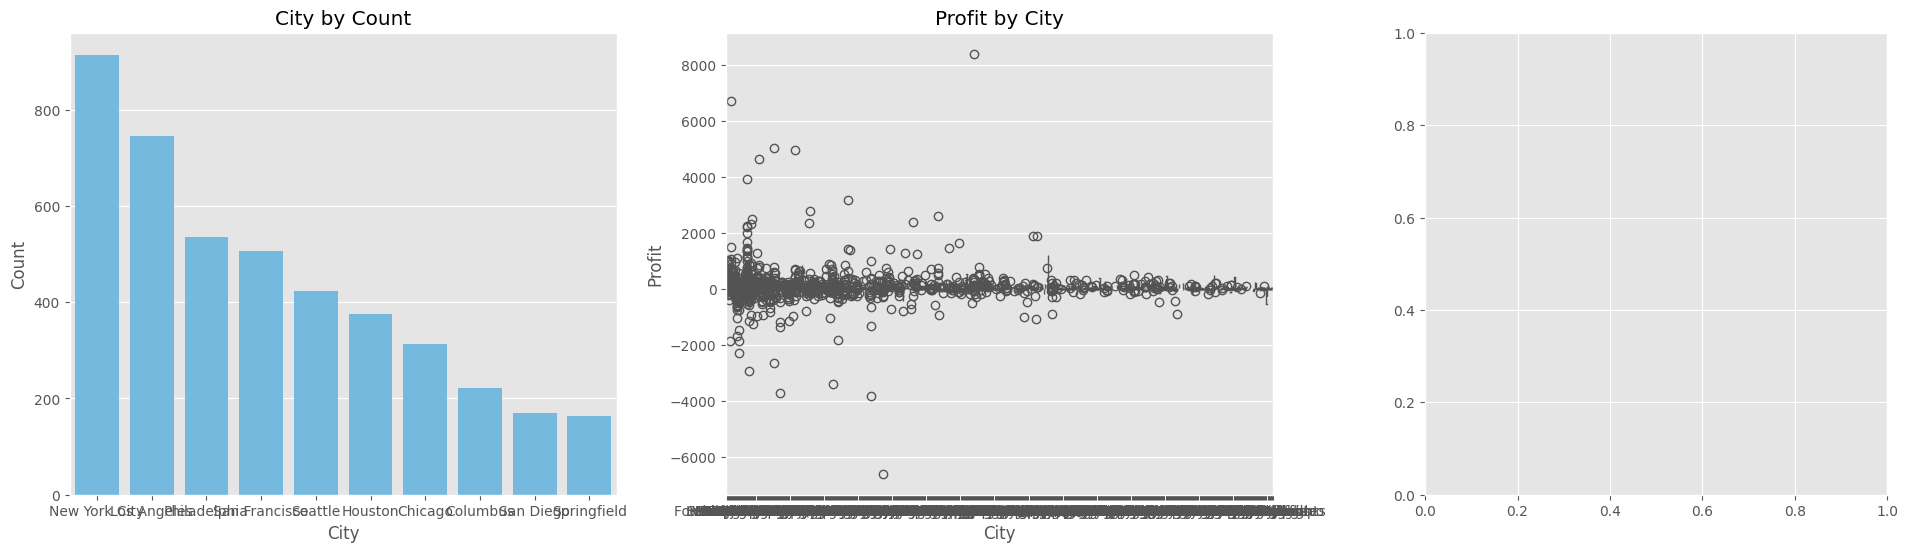

In [123]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
c_count = df_store['City'].value_counts().nlargest(10)

# Barplot
ax1 = sns.barplot(c_count, ax=ax1,  color='#63bff0')
ax1.set_title('City by Count')
ax1.set_ylabel('Count')
ax1.set_xlabel('City')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['City'], ax=ax2)
ax2.set_title('Profit by City')
ax2.set_xlabel('City')

# Piechart
s_colors = ['#6cd4c5', '#63bff0', '#de6e56']
s_labels = ['Consumer', 'Corporate', 'Home Office']
plt.pie(c_count, colors=s_colors, labels=s_labels, autopct='%.1f %%', startangle=90)
plt.title('Distribution of City')
plt.text(-1.6, -1.3, f'Consumer: {c_count.iloc[0]}\nCorporate: {c_count.iloc[1]}\nHome Office: {c_count.iloc[2]}', horizontalalignment='left')

plt.show()

In [124]:
df_store['Category'].value_counts()

Category
Office Supplies    6012
Furniture          2118
Technology         1847
Name: count, dtype: int64

In [120]:
df_store

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200
